
# Face Recognition using Principal Component Analysis


#### Import Libraries

In [9]:
from PIL import Image
import numpy as np
from numpy import asarray
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
from sklearn.metrics import accuracy_score

### Import Dataset
Assigning labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensuring that the test data contains atleast one image from each category.

### 1. Loading Dataset and Dividing to Train-Test Splits

In [2]:
def getTrainTestSplits(folderName,trainSize):
    allFolders = []
    for folders in os.listdir(folderName):
        if folders[0] == 's':
            allFolders.append(folders)


    firstX = 1
    firstY = 1
    Y_train = []
    Y_test = []
    
    for folder in allFolders:
        loc = folderName+"/"+folder
        count = 0
        folnum = int(folder[1:])
        for file in os.listdir(loc):
            fileLocation = loc + "/" + file
            image = Image.open(fileLocation)
            pixels = asarray(image)
            pixels = np.reshape(pixels,[1,pixels.shape[0]*pixels.shape[1]])

            if(count < trainSize):
                if(firstX):
                    X_train = pixels
                    firstX = 0
                else:
                    X_train = np.vstack([X_train,pixels])
                Y_train.append(folnum)
            else:
                if(firstY):
                    X_test = pixels
                    firstY = 0
                else:
                    X_test = np.vstack([X_test,pixels])
                Y_test.append(folnum)


            count = count + 1

    return X_train,Y_train,X_test,Y_test

In [3]:
X_train,Y_train,X_test,Y_test = getTrainTestSplits("../data/ATnT",6)

### 2. Implementation of  PCA Algorithm.

In [4]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""

def topPrincipalComponents(eigen_values,eigen_faces,num_of_components):
    ef = eigen_faces[:,:num_of_components]
    return ef

def principalComponentAnalysis(X):
    
    # First Step is to find the Co-Variance Matrix of X
    
    # We know that Co-variance is: 1/n summation(till n) of (xi - Mean(Cx))(yi - Mean(Cy))
    
    # firstly, Applying  Standardisation to make sure everyone has relative contribution
    
    
    #### Column Standarization

    global all_means
    all_means = np.mean(X,axis=0)

    X = X - all_means
    
    ### Finding Co-variance Matrix
    coVar = np.cov(X.T)
    
    
    ### Finding eigen values,eigen vectors
    values,vectors = eigh(coVar)
    
    sorted_index = (-values).argsort()
    sorted_eigen_faces = vectors[:,sorted_index]
    
    return values,sorted_eigen_faces
        
    

    
eigen_values,eigen_faces = principalComponentAnalysis(X_train)


In [5]:
print("Eigen Faces Shape: ",eigen_faces.shape)
print("Eigen Values Shape: ",eigen_values.shape)

Eigen Faces Shape:  (10304, 10304)
Eigen Values Shape:  (10304,)


### Implement Image Reconstruction from Eigenfaces

In [6]:
# Function to implement image reconstruction by taking arguements as necessary.
def imageReconstruction(row,all_means,ef,Y_train,img_num,cmp,j,tmp):
    # Subtracting data point from Mean(Column)
    row = row - all_means
    
    # Matrix Multiplication with eigen faces
    xk = np.matmul(row,ef)
    
    row = np.matmul(xk,ef.T)
    
    #Adding back the mean subtracted
    row = row + all_means
    
    #Reshaping it to get actual image dimension
    row = np.reshape(row,[112,92])
    
    # Plotting
    plt.subplot(6,6,tmp+1)
    
    plt.imshow(row)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    if(j == 5):
        print('Face Number: '+str(img_num))
        plt.show()
        
    img = Y_train[img_num]

  

### Visualization of Mean Eigen Faces

/var/folders/9j/rpjsxm596q352pwlqm6tpjyr0000gn/T/ipykernel_39950/3137592579.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=pyplot.subplots(1,1,figsize=(6,6))


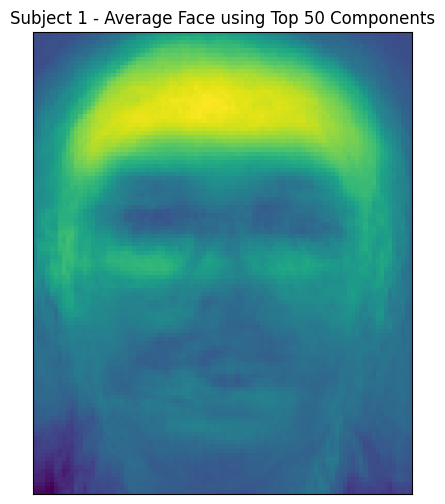

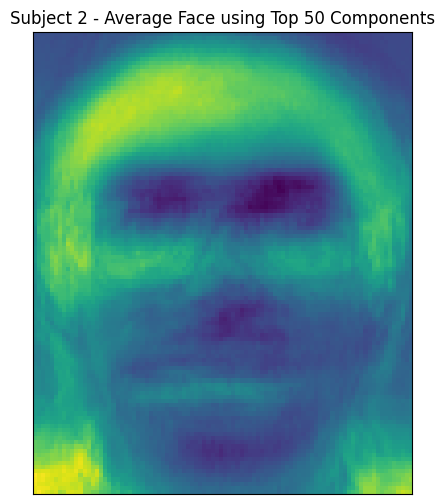

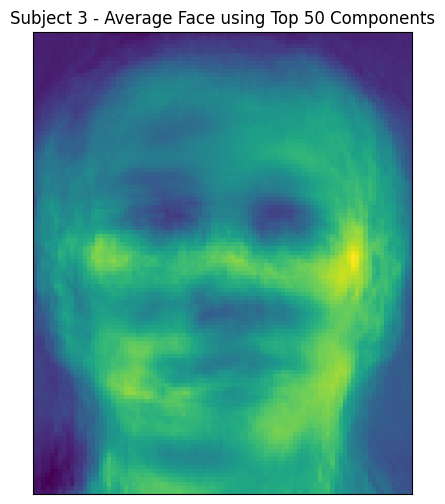

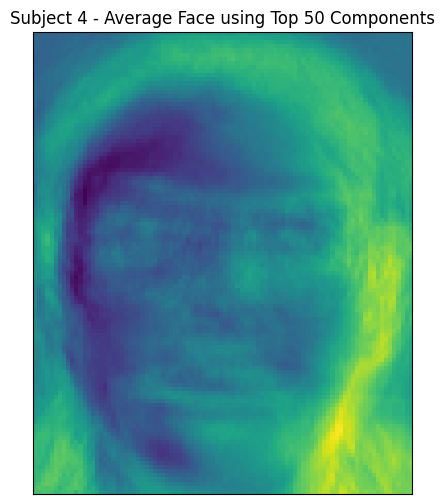

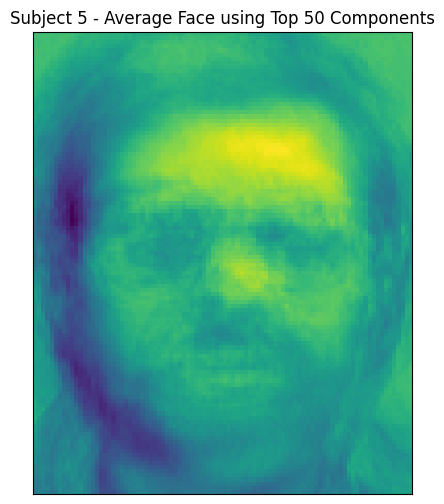

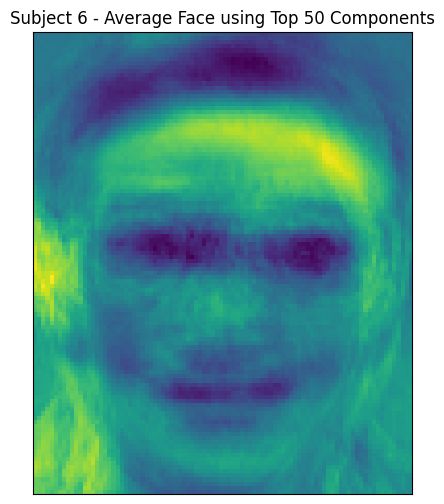

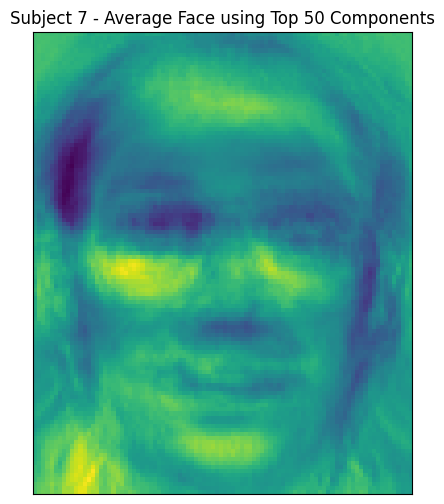

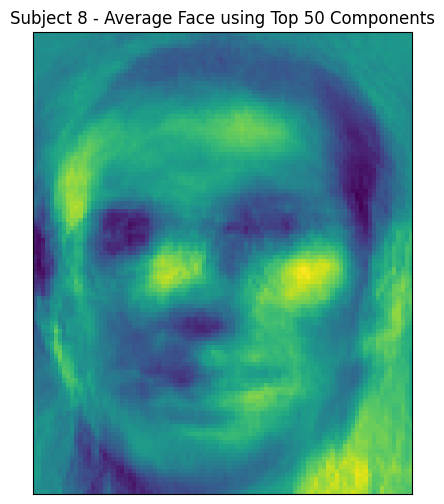

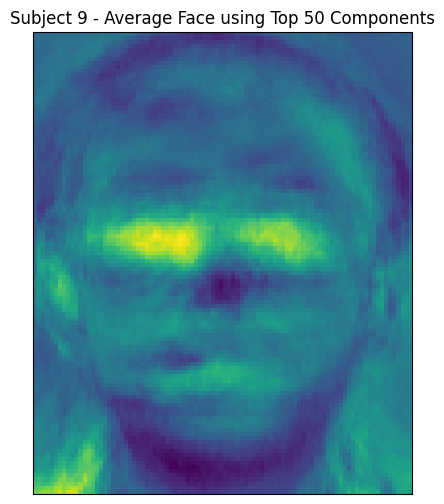

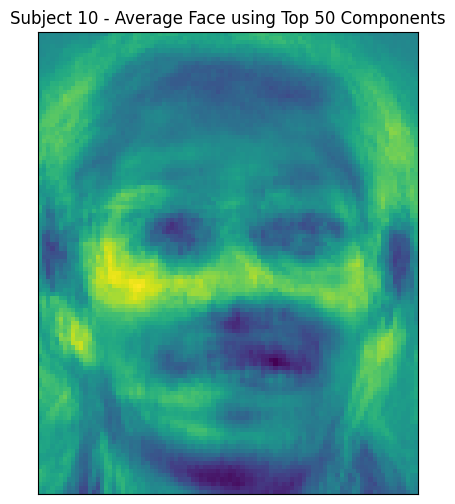

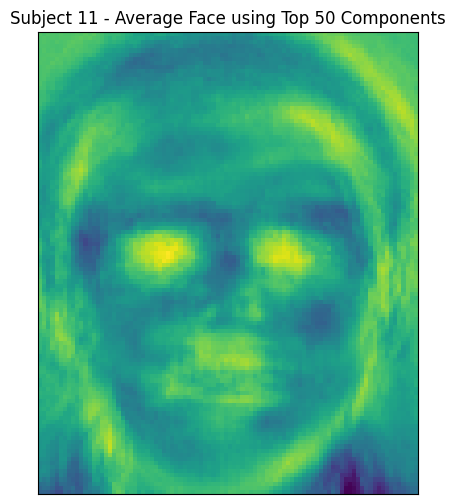

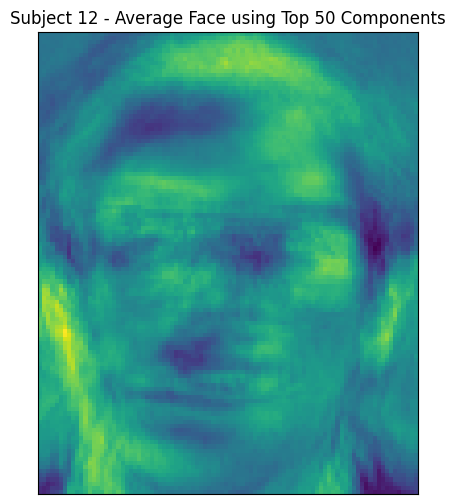

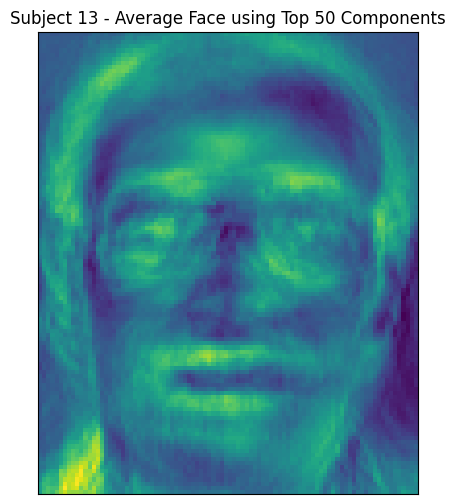

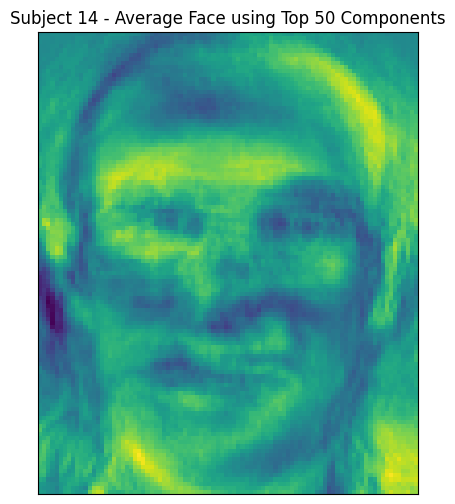

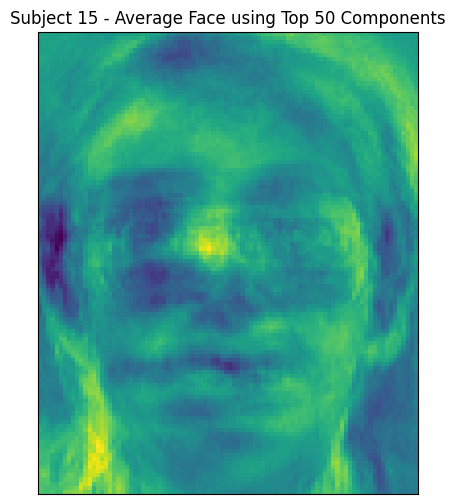

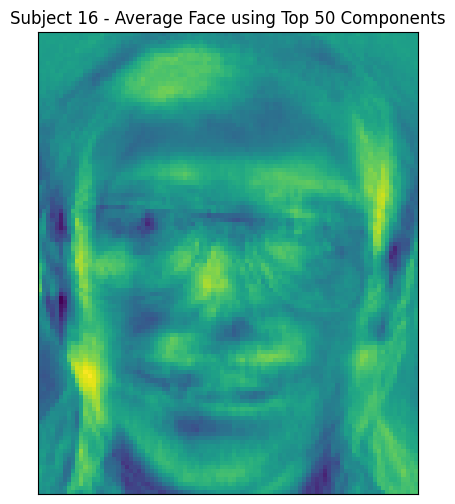

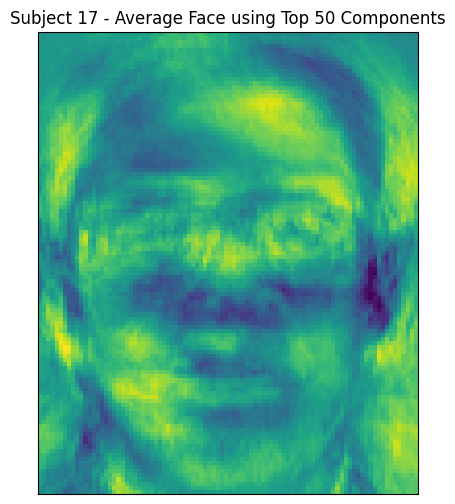

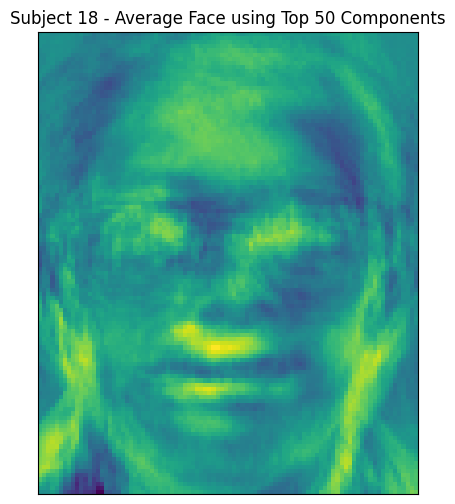

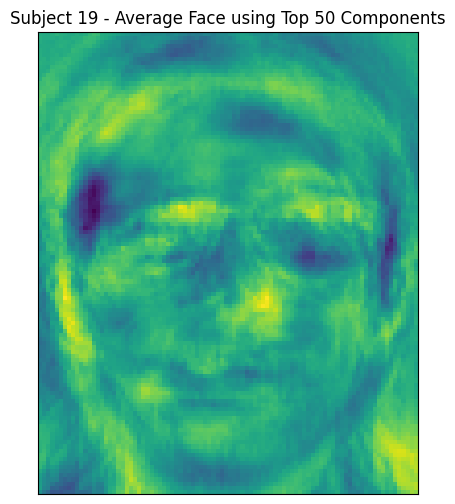

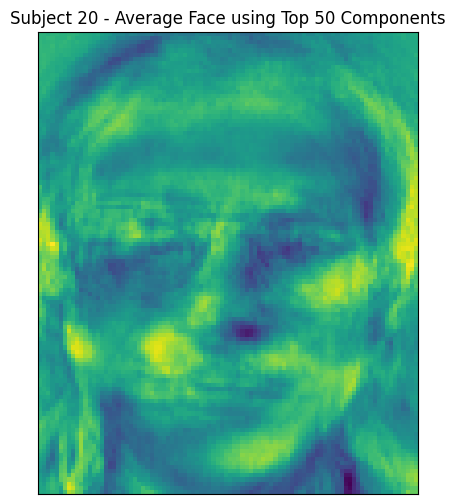

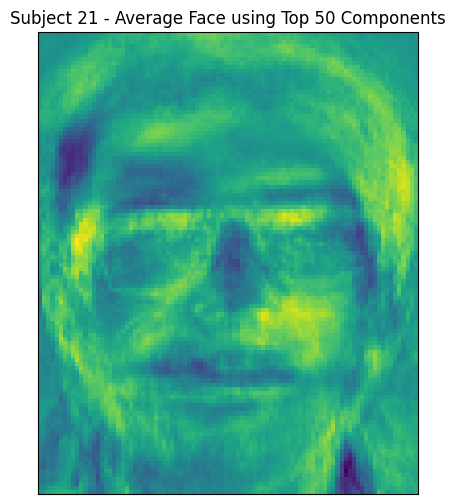

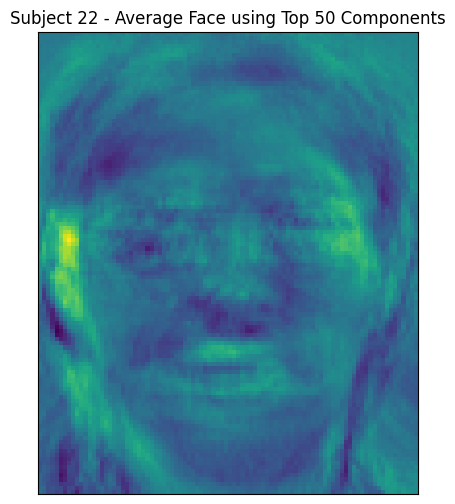

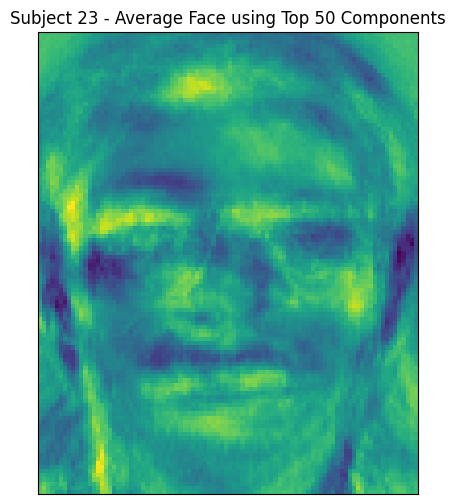

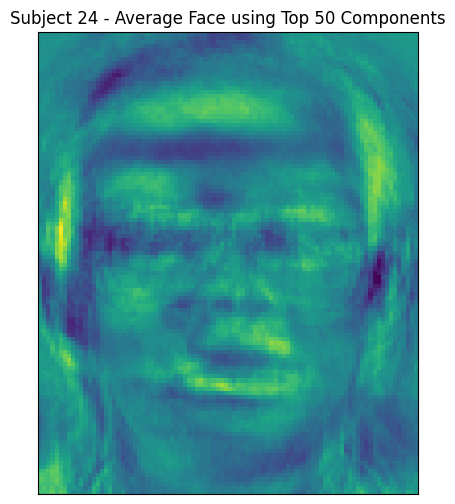

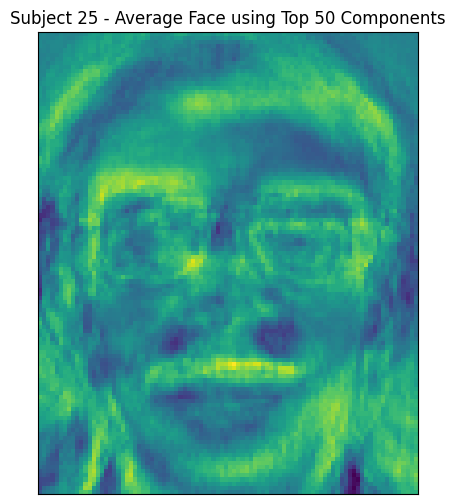

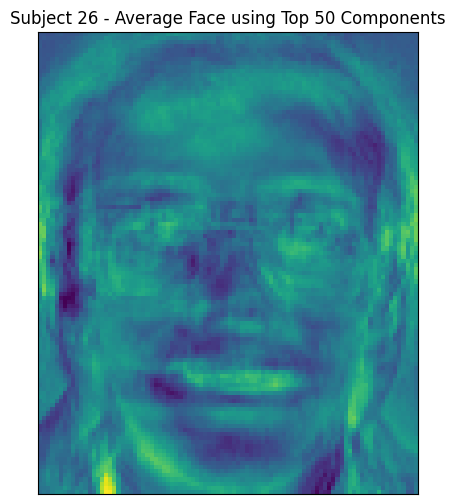

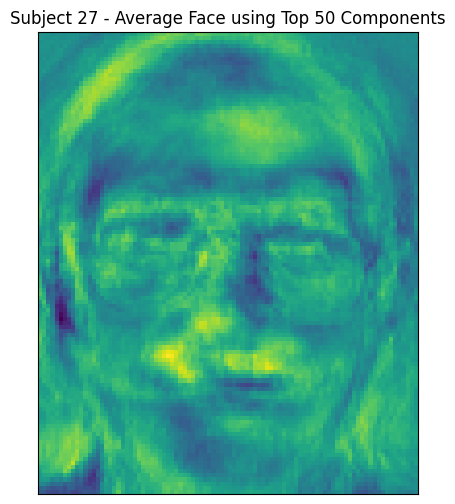

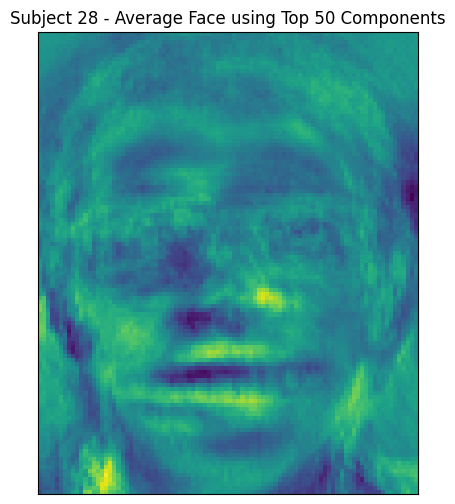

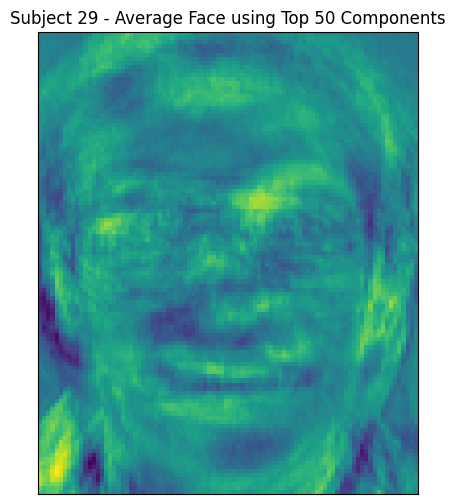

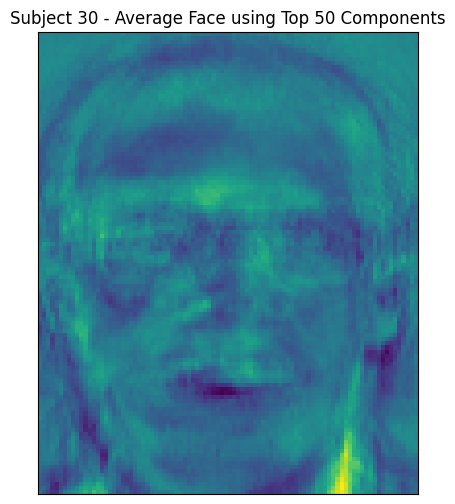

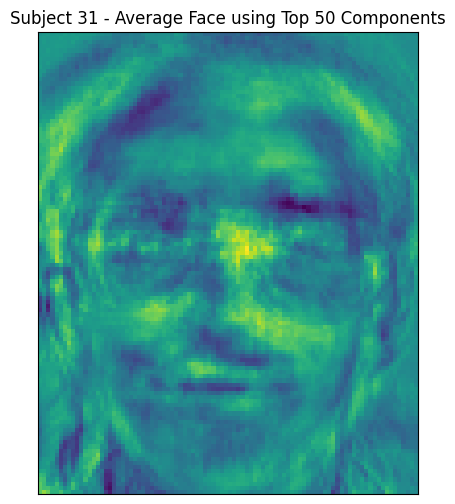

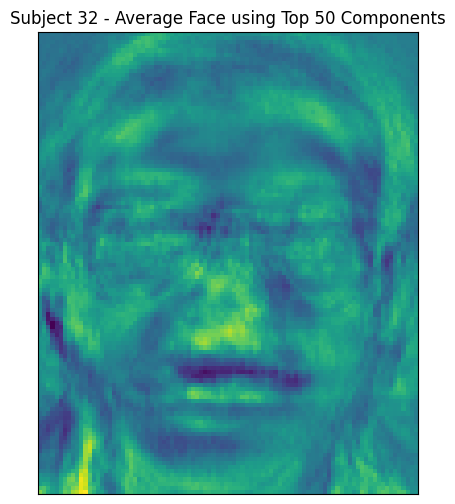

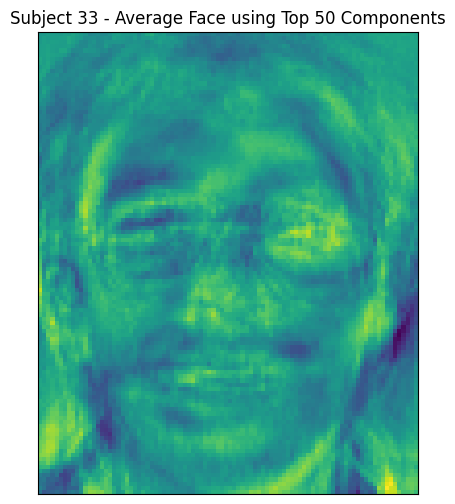

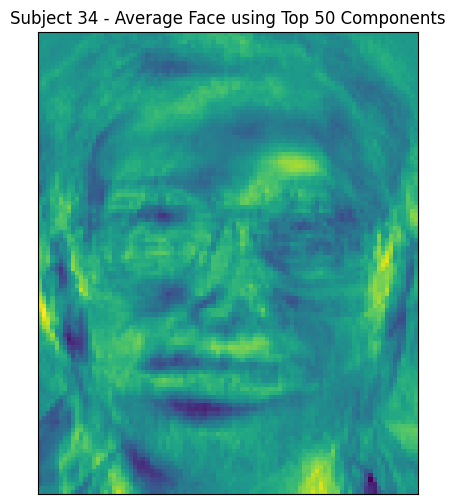

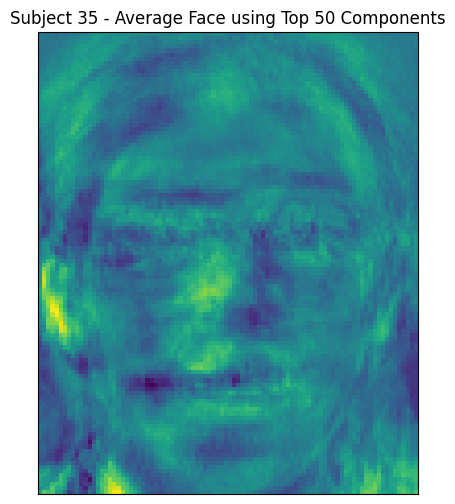

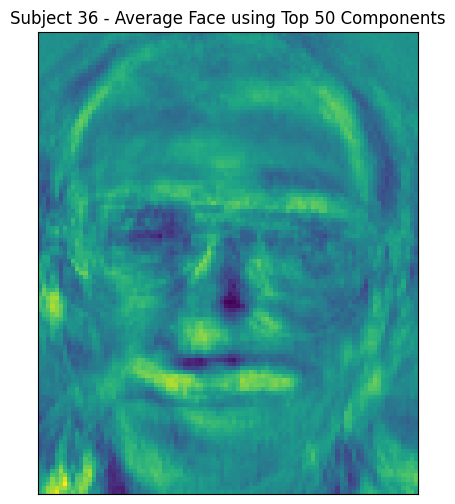

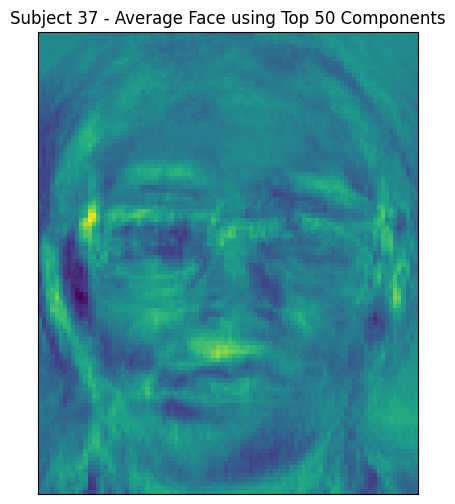

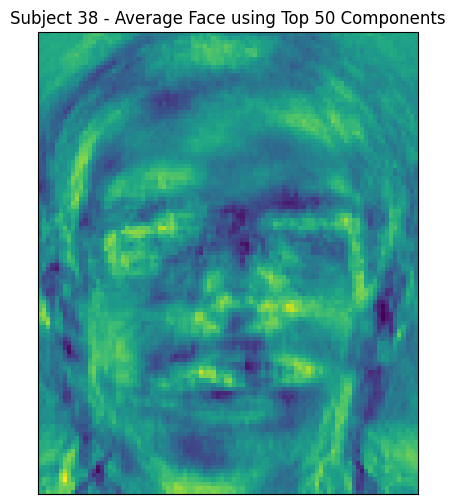

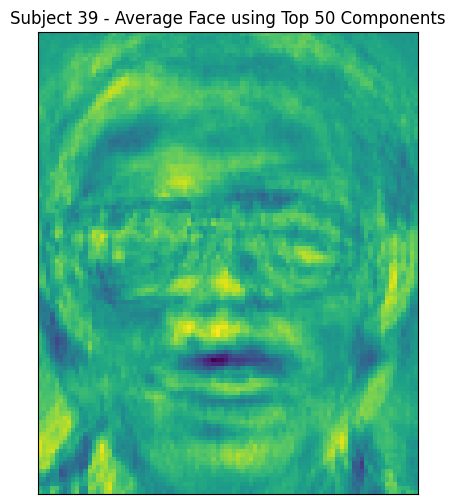

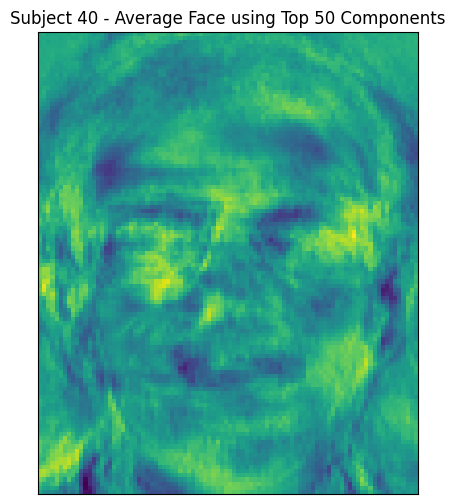

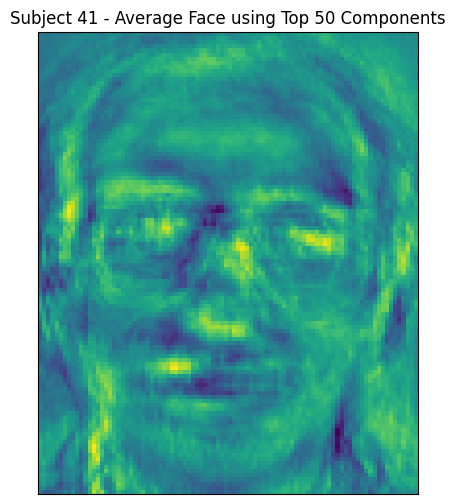

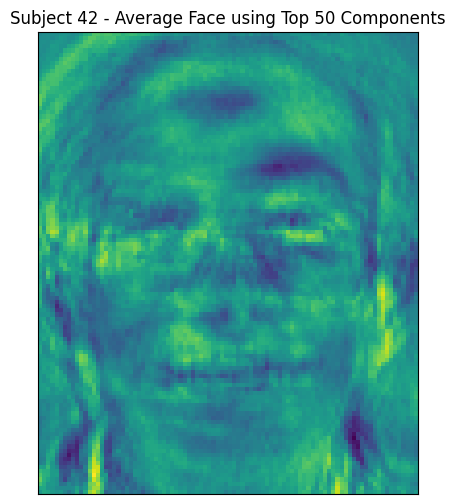

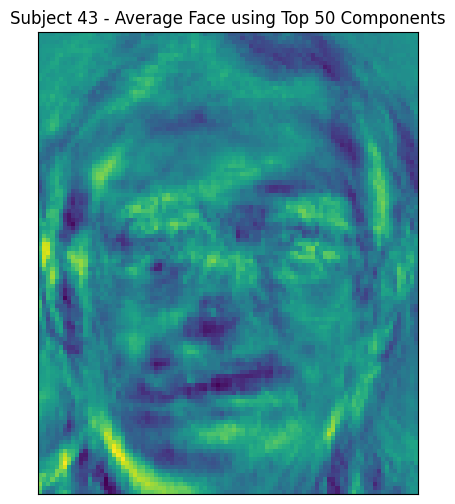

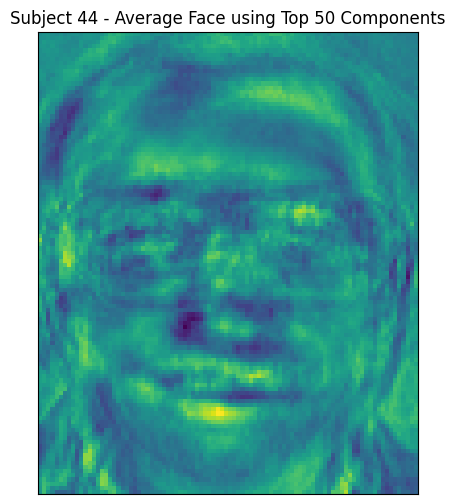

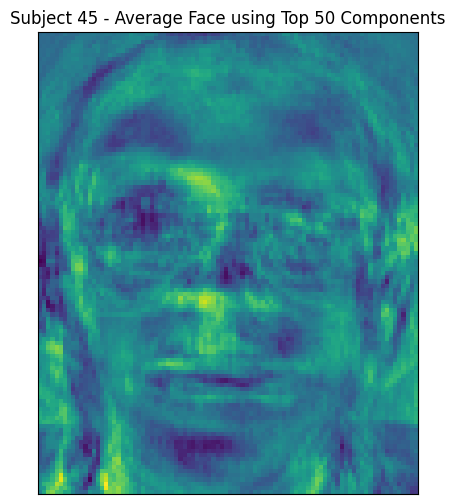

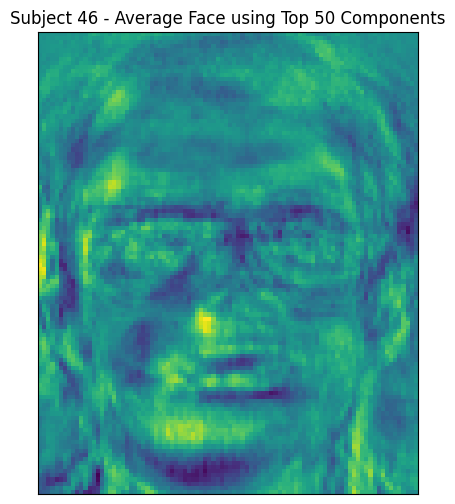

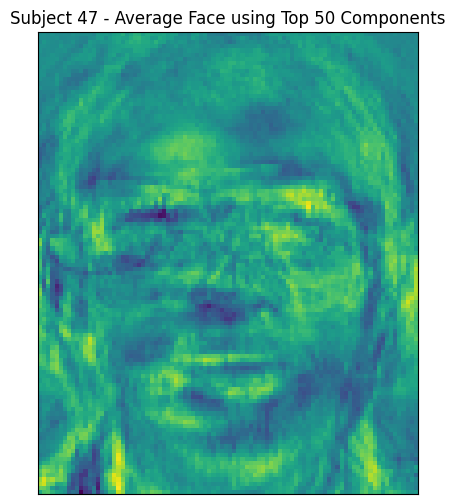

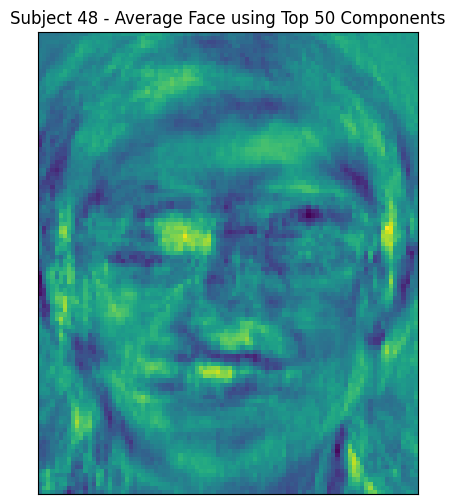

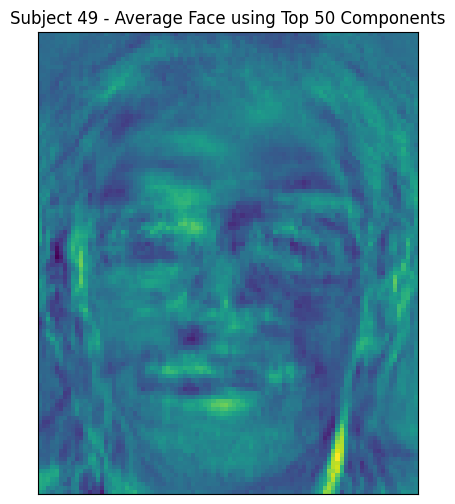

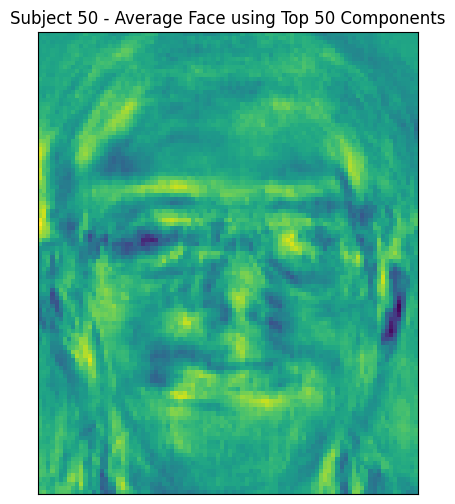

In [14]:
## Choosing the top 50
ef = topPrincipalComponents(eigen_values,eigen_faces,50)
tmp = 0
for i in range(0,ef.shape[1]):
    tf = ef[:,i]
    fig,ax=pyplot.subplots(1,1,figsize=(6,6))
    ax.imshow(tf.reshape((112,92)))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Subject '+str(i+1) + ' - Average Face using Top 50 Components')

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

Face Number: 0


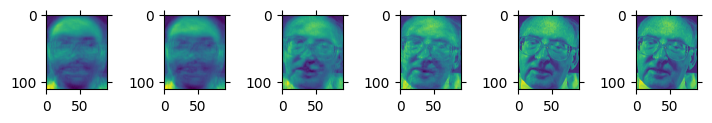

Face Number: 20


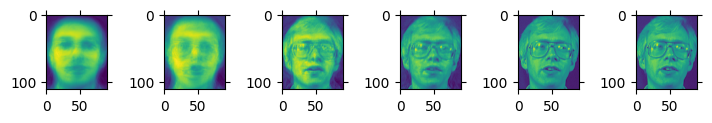

Face Number: 40


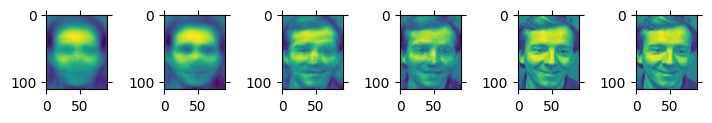

Face Number: 60


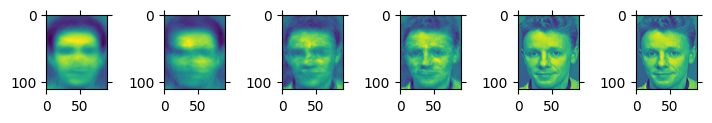

Face Number: 80


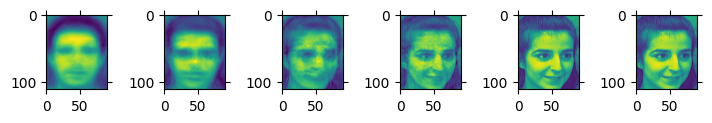

Face Number: 100


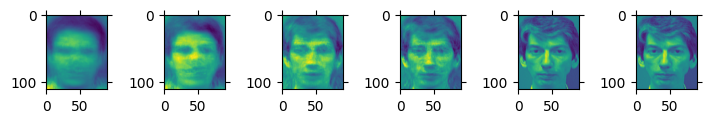

Face Number: 120


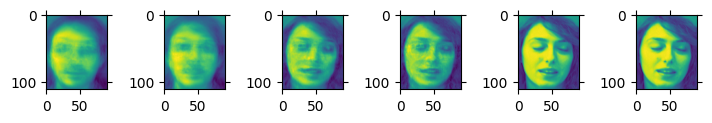

Face Number: 140


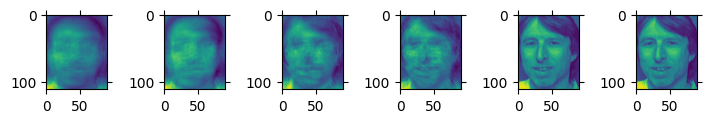

Face Number: 160


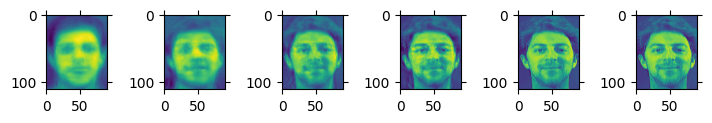

Face Number: 180


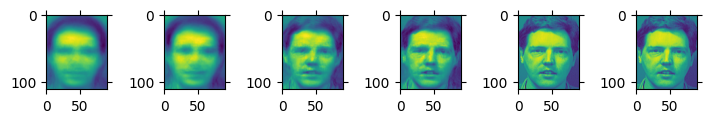

Face Number: 200


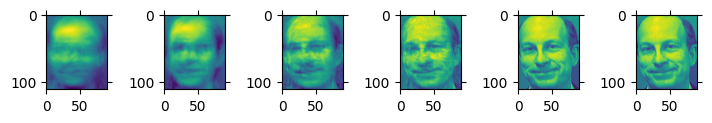

Face Number: 220


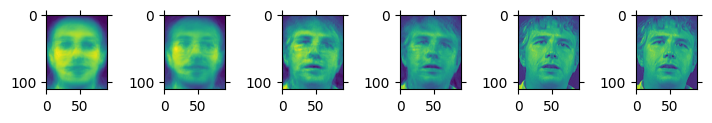

In [15]:
comp_values = [5,10,50,100,1000,10304]

i=0
while(i < len(X_train)):
    tmp = 0
    for j in range(len(comp_values)):
        ef = topPrincipalComponents(eigen_values,eigen_faces,comp_values[j])
        imageReconstruction(X_train[i,:].reshape(1,10304),all_means.reshape(1,10304),ef,Y_train,i,comp_values[j],j,tmp)
        tmp = tmp + 1
    i = i + 20

### Implement face recognition module based on the norm

In [16]:

def model(row,X_train,Y_train,ef,X_TrainDot,X_TestDot):

    minus = np.sqrt(np.sum((X_TrainDot - row)**2,axis=1))
    final_label = np.argmin(minus)
    min_dist = minus[final_label]
    return final_label,min_dist


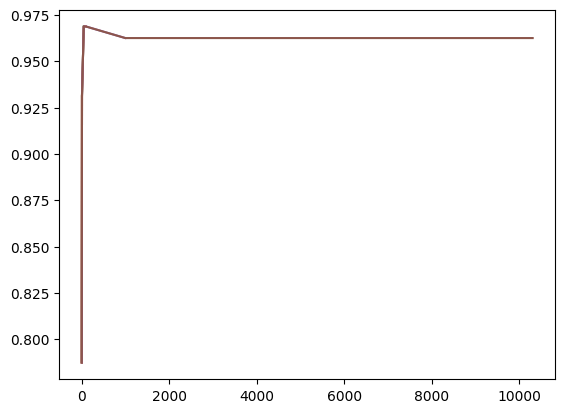

In [17]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""
import math


## Iterating over rows of X_test
x_plots = []
y_plots = []

mean_x_plot = []
mean_y_plot = []

lmean_x_plot = []
lmean_y_plot = []

for j in range(len(comp_values)):
    ef = topPrincipalComponents(eigen_values,eigen_faces,comp_values[j])
    X_TrainDot =  np.matmul(X_train,ef)
    X_TestDot =   np.matmul(X_test,ef)
    flabels = []
    avg = 0
    for row in X_TestDot:
        final_label,errorValue = model(row,X_train,Y_train,ef,X_TrainDot,X_TestDot)
        flabels.append(Y_train[final_label])
        avg = avg + errorValue
    
    mean_x_plot.append(comp_values[j])
    mean_y_plot.append(avg/comp_values[j])
#     mean_y_plot.append(avg/len(X_TestDot))
    
    lmean_x_plot.append(comp_values[j])
    lmean_y_plot.append(math.log(avg/comp_values[j]))
    
    score = accuracy_score(Y_test,flabels)
    x_plots.append(comp_values[j])
    y_plots.append(score)
    plt.plot(x_plots,y_plots)
    
    
    
plt.show()

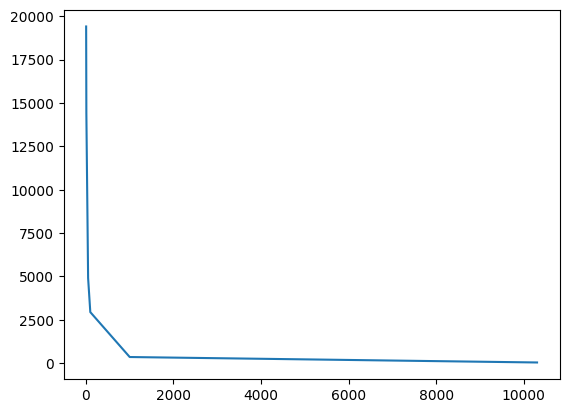

In [199]:
# Plot Number of eigenvectors vs Mean Square Error
plt.plot(mean_x_plot,mean_y_plot)
plt.show()

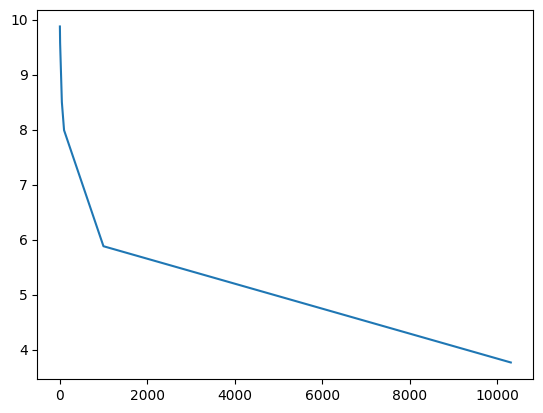

In [200]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error
plt.plot(lmean_x_plot,lmean_y_plot)
plt.show()